<a href="https://colab.research.google.com/github/sharifulofsust/Hotel-Booking-Data-Analysis/blob/main/Hotel_booking_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# **Project Name**    - Hotel Booking Analysis

In [ ]:
# Importing necessary libraries needed in EDA
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px        # will be used for plotting
import warnings
warnings.filterwarnings('ignore')

**IMPORTING THE** **DATASET**

In [ ]:
hotel_data=pd.read_excel('Hotel Bookings.xlsx')
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**PERFORMING THE EDA ON THE DATASET AND DATA CLEANING**

In [ ]:
#to know the shape of the data
hotel_data.shape

(119390, 32)

The dataset has 119390 records and 32 columns

In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
#let's check the columns of the dataset
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#let's look at the first five records
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#let's look at the last five records
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
len(hotel_data)

119390

In [ ]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


now we will check the null/missing values of the dataset


In [ ]:
hotel_data.isnull().values.any()

True

In [ ]:
hotel_data.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The country column, agent column and company column has missing values
Here we can see that agent and company has a lot of missing value.

In [ ]:
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent
hotel_data['agent'].fillna(0,inplace=True)
hotel_data['company'].fillna(0,inplace=True)

In [ ]:
# replacing null values in children column with 0 assuming that family had 0 children
hotel_data['children'].fillna(0,inplace=True)

In [ ]:
# replacing null values in country column as 'Others'
hotel_data['country'].fillna('others',inplace=True)

In [ ]:
#now let's check out if the data has any missing values
hotel_data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#now we will check the duplicates value of the dataset
hotel_data.duplicated().sum()

31994

the dataset has 31994 duplicates values. Now we will delete them all

In [ ]:
hotel_data.drop_duplicates(inplace=True)

In [ ]:
hotel_data.duplicated().sum()

0

In [ ]:
hotel_data.shape

(87396, 32)

now our dataset has almost 90 thousand records

In [ ]:
hotel_data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,178,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371


**Let's check unique values for each object type variables**

---



In [ ]:
for col in hotel_data.describe(include='object').columns:
 print(col)
 print(hotel_data[col].unique())
 print('-'*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'others' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CI

In [ ]:
hotel_data['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [ ]:
hotel_data['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

In [ ]:
hotel_data['meal'].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [ ]:
hotel_data['country'].value_counts().head(10)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

In [ ]:
hotel_data['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
hotel_data['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
hotel_data['reserved_room_type'].value_counts()

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

In [ ]:
hotel_data['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

In [ ]:
hotel_data['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

In [ ]:
hotel_data['arrival_date_year'].value_counts()

2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

In [ ]:
hotel_data['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

After **manipulating** the dataset these are the **insights I found**:

**1**:Most of the information are from *City Hotel*

**2**: Most of the bookings were made in the last quarter of the year

**3**:Most of the meal were *BB* and *SC*

**4**: Most of the bookings were made from *Portugal* and *Great Britian*

**5**: ONLINE TA is mostly responsible for marketing of the hotels

**6**: Most of the tourists are comfortable with *No Deposit* preference

**7**: Most of the tourists were *Transient* and  *Transient  Party*

**8**:  2016 has got the highest number of tourists

In [ ]:
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
pd.crosstab(hotel_data['market_segment'],hotel_data['reservation_status'])

reservation_status,Canceled,Check-Out,No-Show
market_segment,,,
Aviation,34,182,11
Complementary,77,614,11
Corporate,441,3702,69
Direct,1557,10067,180
Groups,1299,3607,36
Offline TA/TO,1888,11826,175
Online TA,17713,33373,532
Undefined,2,0,0


From this crosstab, we can say that Online TA is the most effective marketing strategy as most of the check-out are from this category

In [ ]:
pd.crosstab(hotel_data['is_canceled'],hotel_data['customer_type'])

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,2627,490,50314,9940
1,512,54,21672,1787


most of the customers who cancelled the bookings are transient type customer

In [ ]:
pd.crosstab(hotel_data['is_canceled'],hotel_data['arrival_date_year'])

arrival_date_year,2015,2016,2017
is_canceled,,,
0,10609,31183,21579
1,2704,11208,10113


Most of the bookings were cancelled in the year 2016

In [ ]:
# adding some new columns to make our data analysis ready
hotel_data['total_people'] = hotel_data['adults'] + hotel_data['babies'] + hotel_data['children']       # creating total people column by adding all the people in that booking

hotel_data['total_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']    # creating a column to check total stay by prople in that bookin

In [ ]:
hotel_data['total_people'].value_counts().head(10)

2.0     57057
1.0     16072
3.0     10078
4.0      3870
0.0       166
5.0       136
26.0        5
12.0        2
27.0        2
20.0        2
Name: total_people, dtype: int64

Here we can see that in most case total number of customer in each bookings are two

In [ ]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

In [ ]:
hotel_data['adr'].describe()

count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [ ]:
#here we can say that adr has some extreme values. So we will remove them
hotel_data=hotel_data[hotel_data['adr']<5000]
hotel_data=hotel_data[hotel_data['adr']>0]

In [ ]:
hotel_data['adr'].describe()

count    85616.000000
mean       108.485054
std         50.225047
min          0.260000
25%         74.457500
50%         99.000000
75%        135.000000
max        510.000000
Name: adr, dtype: float64

##now we wil  analyze and visualize different columns of the dataset

In [ ]:
hotel_percentage=hotel_data['hotel'].value_counts(normalize=True)
hotel_percentage

City Hotel      0.611451
Resort Hotel    0.388549
Name: hotel, dtype: float64

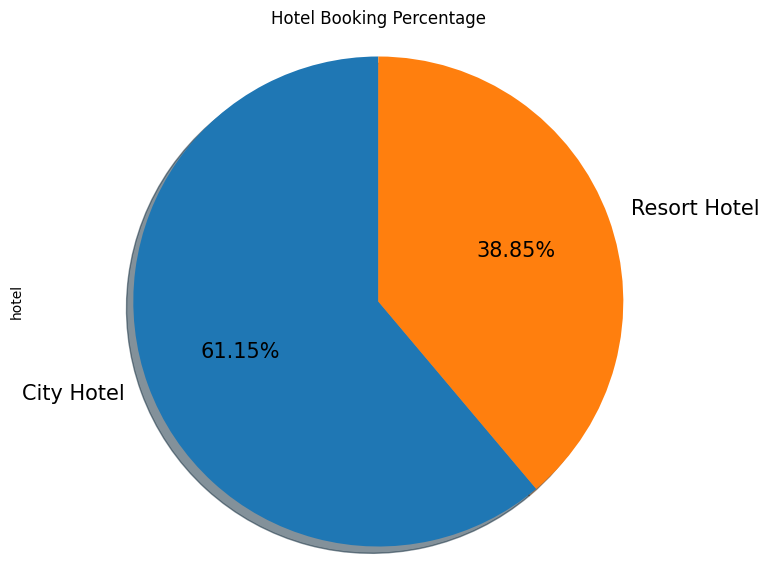

In [ ]:
#here we can see that 61% reservation were made in City Hotel and Resort Hotel has 39% reservation. Now we will draw a pic chart to show that
hotel_count = hotel_data.hotel.value_counts()

# Plotting Values in a simple pie chart
hotel_count.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=90)
# Setting the title
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()


now we will check out  reservation cancelation status


In [ ]:
cancellatioin_perc=hotel_data['is_canceled'].value_counts(normalize=True)
cancellatioin_perc

0    0.721559
1    0.278441
Name: is_canceled, dtype: float64

Here we can see that almost 28% reservation were cancelled

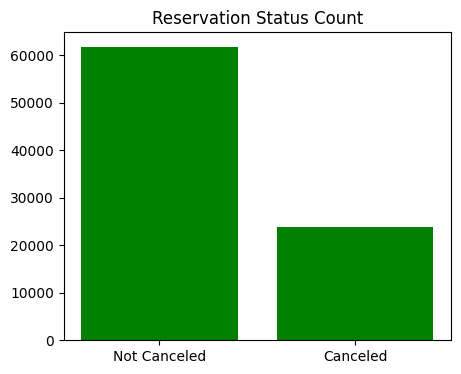

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'],hotel_data['is_canceled'].value_counts(),color='green')
plt.show()

Now we will inspect which hotel has more cancelation ratio and reason behind that

In [ ]:
city_hotel=hotel_data[hotel_data['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.695549
1    0.304451
Name: is_canceled, dtype: float64

City Hotel has almost 31% cancelation ratio which is pretty high.Now we will inspect for the resort hotel

In [ ]:
resort_hotel=hotel_data[hotel_data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.76249
1    0.23751
Name: is_canceled, dtype: float64

Resort Hotel has almost 24% cancelation ratio. Thus we can see that city Hotel's situation is not so good compared to Resort Hotel. Now we will draw a graph to visualize that

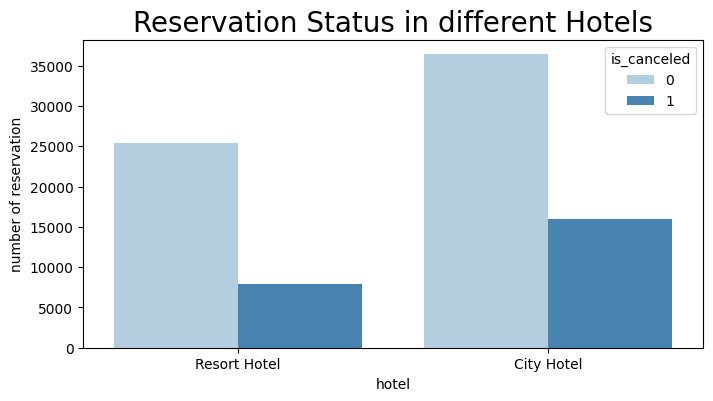

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x=hotel_data['hotel'],hue='is_canceled',data=hotel_data,palette='Blues')
legend_labels,_=ax1.get_legend_handles_labels()
plt.title("Reservation Status in different Hotels",size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservation')
plt.show()



Average Daily Rate may be responsible for the cancellation ratio. Now we will inspect adr for both the hotels

In [ ]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

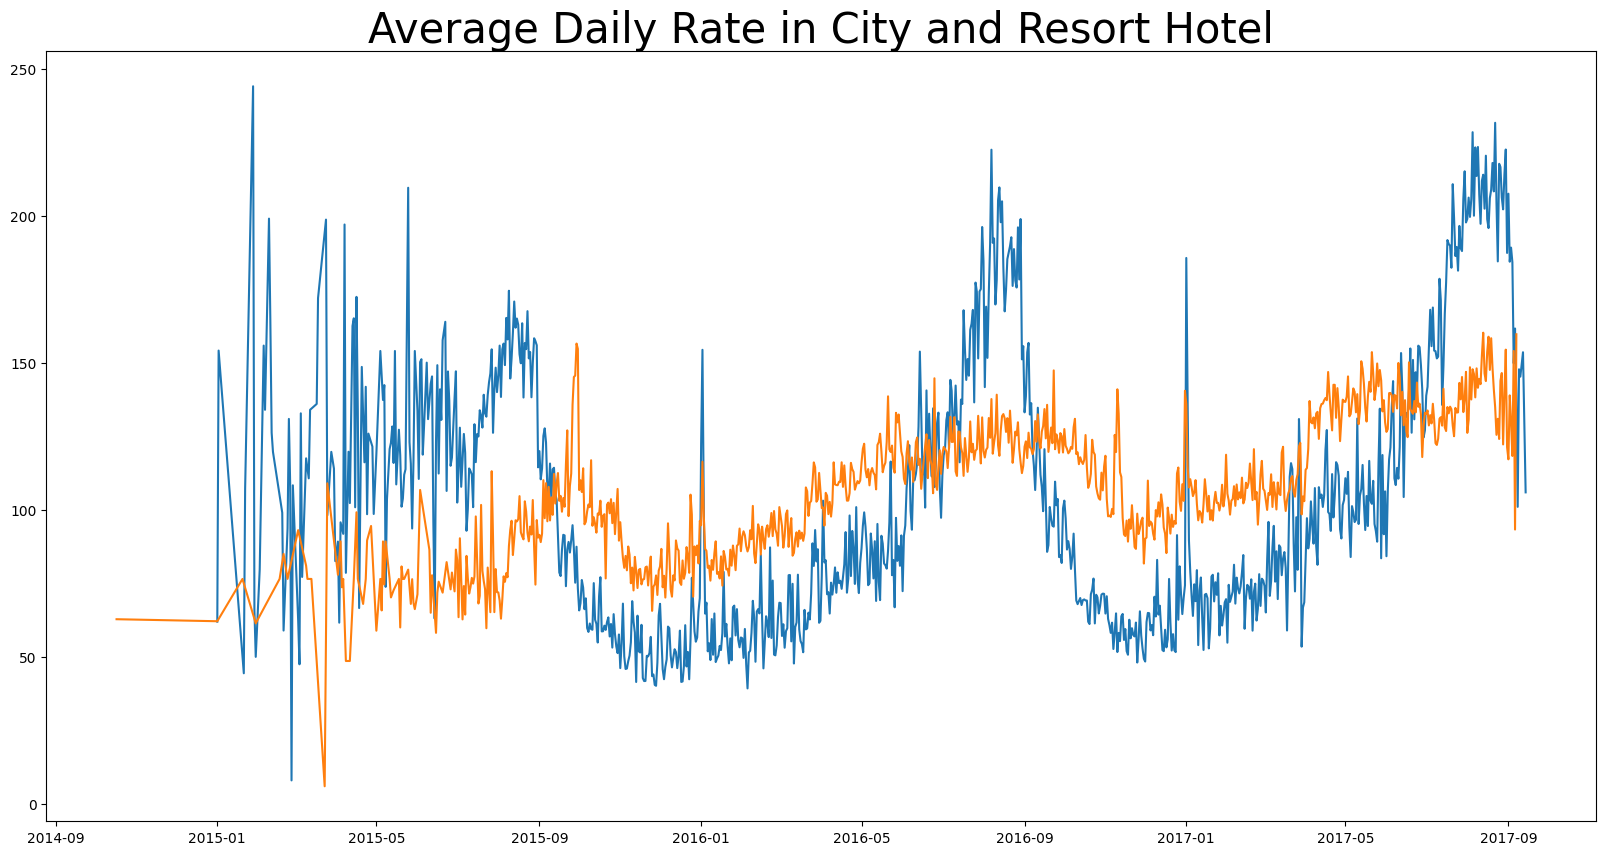

In [ ]:

plt.figure(figsize=(20,10))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.show()


HERE WE CAN SEE THAT SOMETIMES THE PRICE OF RESORT HOTEL IS HIGH, SOMETIMES IT IS CITY HOTEL

In [ ]:
#now we will find correlation between is_canceled and adr. As one variable is categorical and other one is continuous ,we will use point biserial correlation
import pandas as pd
from scipy import stats
point_biserial_corr, p_value = stats.pointbiserialr(hotel_data['is_canceled'], hotel_data['adr'])

print(f'Point-Biserial Correlation Coefficient: {point_biserial_corr}')
print(f'P-value: {p_value}')


Point-Biserial Correlation Coefficient: 0.1234339973771838
P-value: 8.217662436727797e-288


A value of 0.1234 suggests a positive correlation. It indicates that as the is_canceled  variable increases from 0 to 1, the continuous variable adr  tends to increase as well, but the relationship is relatively weak.So we can say that the rate of the hotel room fare is slightly affecting the cancellation ratio


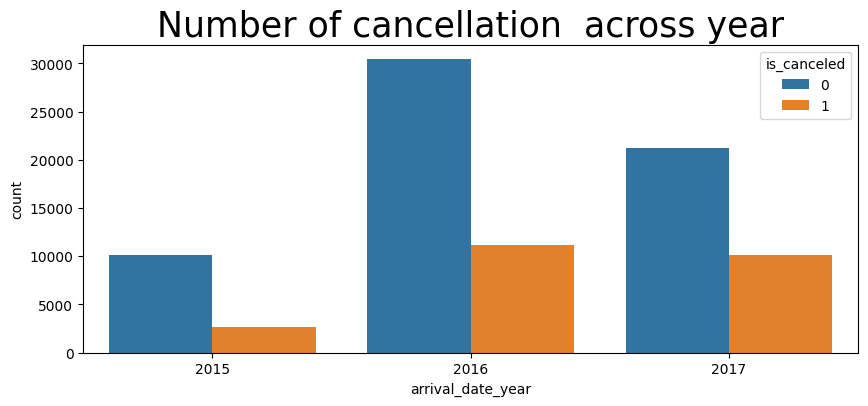

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=hotel_data['arrival_date_year'],hue=hotel_data['is_canceled'])
plt.title("Number of cancellation  across year", fontsize = 25)
plt.show()

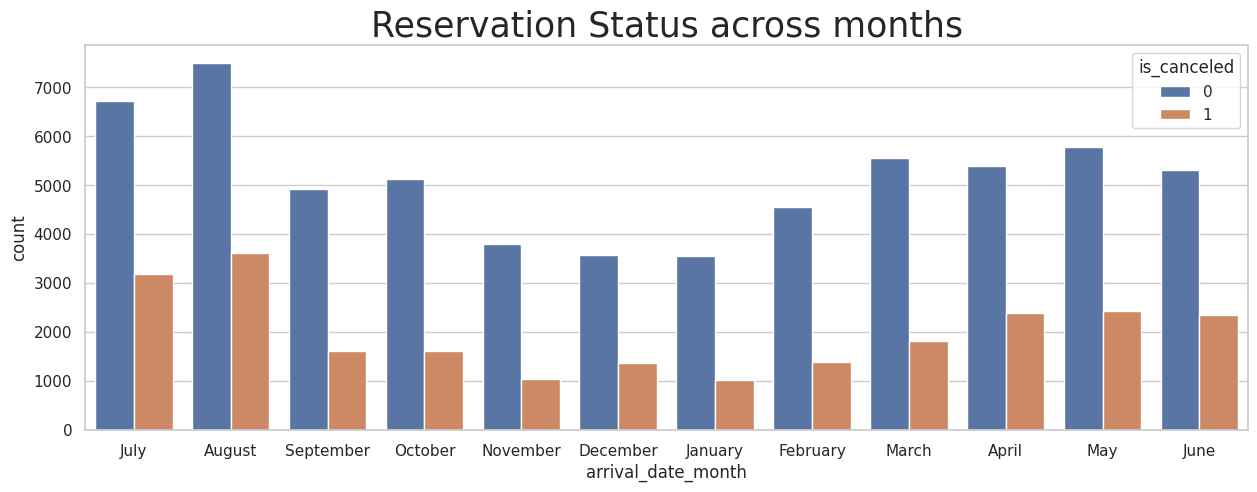

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.countplot(x=hotel_data['arrival_date_month'],hue=hotel_data['is_canceled'])
plt.title("Reservation Status across months", fontsize = 25)
plt.show()

Here we can see that Highest number of reservation were made in  August and at the same time highest number of cancellation also took place in the same month.Now we will look up the price for different month

AttributeError: ignored

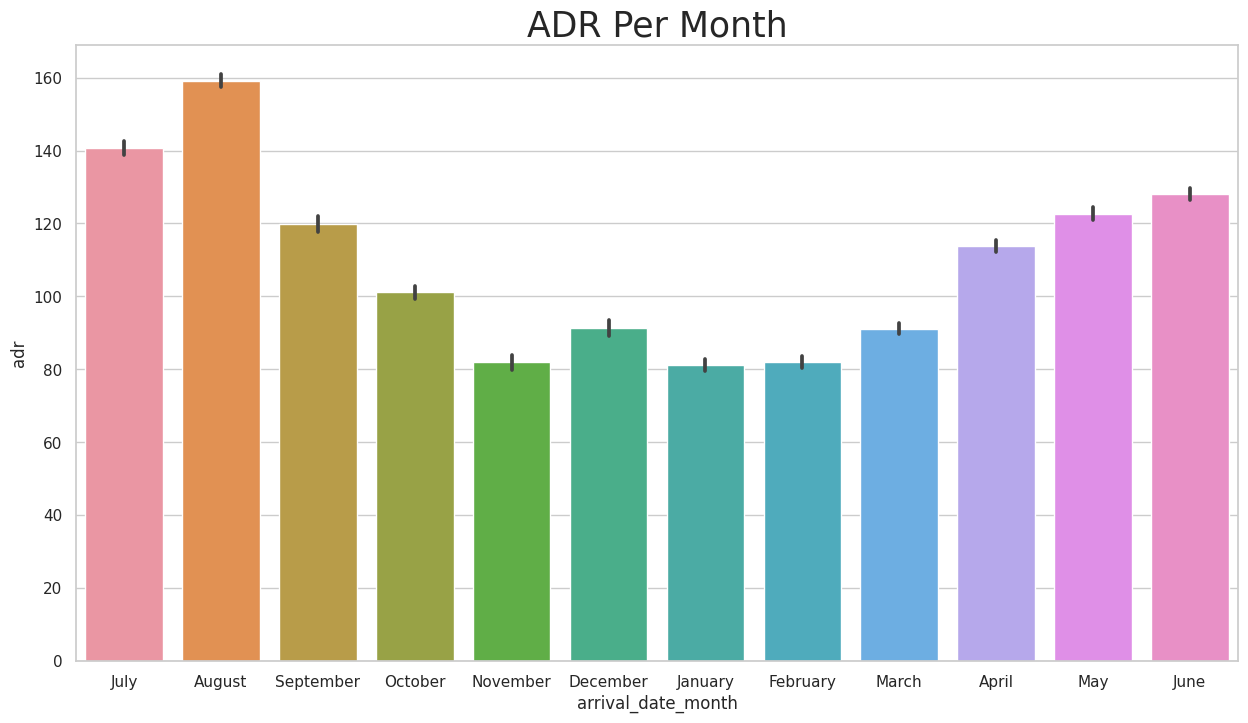

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR Per Month',fontsize=25)
sns.set(style="whitegrid")
sns.barplot(x='arrival_date_month',y='adr',data=hotel_data[hotel_data['is_canceled']==1]).groupby('arrival_date_month')[['adr']].sum()
plt.show()


Here we can see August has the highest ADR and January and February has the lowest ADR. So that's why January and February has the lowest cancellation rate and August has the highest .

## **Now we will perform Spatial Analysis **

In [ ]:
resort = hotel_data[(hotel_data['hotel'] == 'Resort Hotel') & (hotel_data['is_canceled'] == 1)]
City = hotel_data[(hotel_data['hotel'] == 'City Hotel') & (hotel_data['is_canceled'] == 1)]

In [ ]:
resort.shape

In [ ]:
resort['country'].value_counts(normalize=True).head(5)

PRT    0.612201
ESP    0.094039
GBR    0.086824
IRL    0.042906
FRA    0.023668
Name: country, dtype: float64

Most of the cancellation of the Resort Hotel is done from Portugal and *Spain*

In [ ]:
City['country'].value_counts(normalize=True).head(5)

PRT    0.300477
FRA    0.096875
GBR    0.081378
ESP    0.070147
ITA    0.062869
Name: country, dtype: float64

in city hotel we can see the same scenario

In [ ]:
country_wise = hotel_data[hotel_data['is_canceled'] == 1]['country'].value_counts().reset_index()
country_wise.columns = ['country', 'No of guests']
country_wise

,country,No of guests
0,PRT,9626
1,GBR,1983
2,ESP,1861
3,FRA,1731
4,ITA,1074
...,...,...
123,TJK,1
124,NIC,1
125,VGB,1
126,MUS,1


In [ ]:
!pip install folium

In [ ]:
# map graph
import folium
from folium.plugins import HeatMap

In [ ]:
b = folium.Map()

In [ ]:
guests = px.choropleth(country_wise,
                      locations = country_wise['country'],
                    color = country_wise['No of guests'],
                      hover_name = country_wise['country'],
                       title = "Home country of guests"
                      )
guests.show()

In [ ]:
resort.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

In [ ]:
resort.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [ ]:
resort['agent'].value_counts(normalize=True)

240.0    0.625111
0.0      0.085938
250.0    0.062397
242.0    0.029870
241.0    0.027465
           ...   
464.0    0.000127
411.0    0.000127
91.0     0.000127
154.0    0.000127
139.0    0.000127
Name: agent, Length: 116, dtype: float64

By analyzing the guest of resort hotel who have cancelled their reservation, we can see that 62% of the total guests had reserved their bookings by agent number 240. Maybe there was some misinformation by this agent. So we should run an inquiry about this agent

In [ ]:
City['agent'].value_counts(normalize=True)

9.0      0.722362
0.0      0.048249
14.0     0.036517
1.0      0.028046
7.0      0.027293
           ...   
270.0    0.000063
177.0    0.000063
240.0    0.000063
331.0    0.000063
341.0    0.000063
Name: agent, Length: 137, dtype: float64

In the case of City hotel, the agent was #9 who is responsible for the highest bookings. In this case about 72% of the total customers who confirmed their bookings through agent number 9 cancelled their bookings

In [ ]:
resort['market_segment'].value_counts(normalize=True)

Online TA        0.711429
Direct           0.102012
Offline TA/TO    0.100114
Groups           0.055309
Corporate        0.030882
Complementary    0.000253
Name: market_segment, dtype: float64

In [ ]:
City['market_segment'].value_counts(normalize=True)

Online TA        0.790877
Offline TA/TO    0.077801
Direct           0.056783
Groups           0.055088
Corporate        0.016376
Aviation         0.002761
Complementary    0.000188
Undefined        0.000125
Name: market_segment, dtype: float64

In both city and resort hotel case, for the customers who have cancelled their customers, **Online TA** is mostly responsible for the marketing strategy. These customers were reached out mostly by ** Onlilne TA** . So maybe there was some kind of false representation by this marketing team.Proper inquiry is necessary is this case.